In [1]:
#Program: Name: Daily-XChart-H-Graphing-Using-MatplotLib_plotly-export2pdf (range)
#Purpose: Daily (Data Quality) Run for collecting details about system changes and merging-AB into Local-C
#Author:  Greg Turmel, Director, Data Governance 
#Date:    2020.08.30 - 2021.06.30
#Errata:  0.1 Improvements can be made to script using for/looping through the databases

import os, sys, argparse, csv, pyodbc, sql, time, datetime
import sqlalchemy as db
from dotenv import load_dotenv # add this line
import pandas as pd
from pandas import DataFrame

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, plot, iplot

import scipy.stats as stats
from scipy.stats import multivariate_normal

from mpl_toolkits.mplot3d import Axes3D# Create grid and multivariate normal
import seaborn as sns

load_dotenv() # add this line
user = os.getenv('MySQLeUser')
password = os.getenv('MySQLeUserPass')
host = os.getenv('MySQLeHOST')
db = os.getenv('MySQLeDB')
%matplotlib inline
%load_ext sql

In [2]:
Diff1 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\A\A1AppDatadiffRpt.csv', header=1, encoding='1252',
names = ["TodaysDate","SchemaName","TableName","RecordCount","Difference"], parse_dates = ["TodaysDate"])

#local - off-line and not connected to H: - used for development
Diff1 = pd.read_csv(r'C:\Users\eeeeeeeeee\Documents\JupyterAnacondaPythonNotebooks\Daily\local\A1AppDatadiffRpt.csv', header=1, encoding='1252',
names = ["TodaysDate","SchemaName","TableName","RecordCount","Difference"], parse_dates = ["TodaysDate"])

In [3]:
Diff2 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\A\A2AssmtdiffRpt.csv', header=1, encoding='1252',
names = ["TodaysDate","SchemaName","TableName","RecordCount","Difference"], parse_dates = ["TodaysDate"])

#local - off-line and not connected to H: - used for development
Diff2 = pd.read_csv(r'C:\Users\eeeeeeeeee\Documents\JupyterAnacondaPythonNotebooks\Daily\local\A2AssmtdiffRpt.csv', header=1, encoding='1252',
names = ["TodaysDate","SchemaName","TableName","RecordCount","Difference"], parse_dates = ["TodaysDate"])

In [4]:
Diff3 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\A\A3GSDRdiffRpt.csv', header=1, encoding='1252',
names = ["TodaysDate","SchemaName","TableName","RecordCount","Difference"], parse_dates = ["TodaysDate"])

#local - off-line and not connected to H: - used for development
Diff3 = pd.read_csv(r'C:\Users\eeeeeeeeee\Documents\JupyterAnacondaPythonNotebooks\Daily\local\A3GSDRdiffRpt.csv', header=1, encoding='1252',
names = ["TodaysDate","SchemaName","TableName","RecordCount","Difference"], parse_dates = ["TodaysDate"])

In [5]:
Diff4 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\A\A4DwnStrmFeeddiffRpt.csv', header=1, encoding='1252',
names = ["TodaysDate","SchemaName","TableName","RecordCount","Difference"], parse_dates = ["TodaysDate"])

#local - off-line and not connected to H: - used for development
Diff4 = pd.read_csv(r'C:\Users\eeeeeeeeee\Documents\JupyterAnacondaPythonNotebooks\Daily\local\A4DwnStrmFeeddiffRpt.csv', header=1, encoding='1252',
names = ["TodaysDate","SchemaName","TableName","RecordCount","Difference"], parse_dates = ["TodaysDate"])

In [6]:
Diff5 = pd.read_csv(r'H:\ODS Migration Planning\Analysis\DailyRoutines\A\A5GSDR_SyndiffRpt.csv', header=1, encoding='1252',
names = ["TodaysDate","SchemaName","TableName","RecordCount","Difference"], parse_dates = ["TodaysDate"])

#local - off-line and not connected to H: - used for development
Diff5 = pd.read_csv(r'C:\Users\eeeeeeeeee\Documents\JupyterAnacondaPythonNotebooks\Daily\local\A5GSDR_SyndiffRpt.csv', header=1, encoding='1252',
names = ["TodaysDate","SchemaName","TableName","RecordCount","Difference"], parse_dates = ["TodaysDate"])

#1_ApplicationData dbo tables

In [7]:
Diff1dboT66 = Diff1.loc[Diff1['TableName'] == 'ROSTER_GSC'] # Select Table to graph
Diff1dboT67 = Diff1.loc[Diff1['TableName'] == 'ROSTER_GSS'] # Select Table to graph

#Use C:\Users\eeeeeeeeee\Documents\JupyterAnacondaPythonNotebooks\Daily\local\pdf when not GCPS on-line

In [8]:
with PdfPages(r'H:\ODS Migration Planning\Analysis\DailyRoutines\A\figures\pdf\AppData_dbo_charts.pdf') as export_pdf:
    dfx = Diff1dboT66.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('AppData: dbo.ROSTER_GSC', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    dfx = Diff1dboT67.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('AppData: dbo.ROSTER_GSS', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()

#2_Assessment dbo tables

In [9]:
Diff2dboT68 = Diff2.loc[Diff2['TableName'] == 'ASSESS_SAT'] # Select Table to graph
Diff2dboT69 = Diff2.loc[Diff2['TableName'] == 'GATEWAY_STU_HGH'] # Select Table to graph
Diff2dboT70 = Diff2.loc[Diff2['TableName'] == 'GRADUATION_SUMMARY'] # Select Table to graph

Diff2dboT71 = Diff2.loc[Diff2['TableName'] == 'GWY_RETEST_ROSTER'] # Select Table to graph
Diff2dboT72 = Diff2.loc[Diff2['TableName'] == 'GWY_Writing_In_USHistory_ISR'] # Select Table to graph
Diff2dboT73 = Diff2.loc[Diff2['TableName'] == 'ROSTER_CRCT'] # Select Table to graph
Diff2dboT74 = Diff2.loc[Diff2['TableName'] == 'ROSTER_ENR_WR5'] # Select Table to graph
Diff2dboT75 = Diff2.loc[Diff2['TableName'] == 'ROSTER_ENR_WR8'] # Select Table to graph

Diff2dboT76 = Diff2.loc[Diff2['TableName'] == 'ROSTER_GRAD'] # Select Table to graph
Diff2dboT77 = Diff2.loc[Diff2['TableName'] == 'ROSTER_GRAD_FOR_SUMMARY'] # Select Table to graph
Diff2dboT78 = Diff2.loc[Diff2['TableName'] == 'ROSTER_GSC'] # Select Table to graph
Diff2dboT79 = Diff2.loc[Diff2['TableName'] == 'ROSTER_GSS'] # Select Table to graph
Diff2dboT80 = Diff2.loc[Diff2['TableName'] == 'ROSTER_GWY'] # Select Table to graph

Diff2dboT81 = Diff2.loc[Diff2['TableName'] == 'ROSTER_WR58'] # Select Table to graph
Diff2dboT82 = Diff2.loc[Diff2['TableName'] == 'ROSTER_WRI'] # Select Table to graph
Diff2dboT83 = Diff2.loc[Diff2['TableName'] == 'SUBTEST_FACT'] # Select Table to graph
Diff2dboT84 = Diff2.loc[Diff2['TableName'] == 'Survey_Respondent_Report'] # Select Table to graph
Diff2dboT85 = Diff2.loc[Diff2['TableName'] == 'Survey_Respondent_Status'] # Select Table to graph

Diff2dboT86 = Diff2.loc[Diff2['TableName'] == 'TEST_STU_ACC_OOD'] # Select Table to graph

In [10]:
with PdfPages(r'H:\ODS Migration Planning\Analysis\DailyRoutines\A\figures\pdf\Assessment_dbo_charts.pdf') as export_pdf: 
    
    #Assessment: dbo.ASSESS_SAT
    dfx = Diff2dboT68.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.ASSESS_SAT', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    
    #Assessment: dbo.GATEWAY_STU_HGH
    dfx = Diff2dboT69.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.GATEWAY_STU_HGH', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    #Assessment: dbo.GRADUATION_SUMMARY
    dfx = Diff2dboT70.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.GRADUATION_SUMMARY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()

    #Assessment: dbo.GWY_RETEST_ROSTER    
    dfx = Diff2dboT71.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.GWY_RETEST_ROSTER', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    

    #Assessment: dbo.GWY_Writing_In_USHistory_ISR
    dfx = Diff2dboT72.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.GWY_Writing_In_USHistory_ISR', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    #Assessment: dbo.ROSTER_CRCT    
    dfx = Diff2dboT73.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.ROSTER_CRCT', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()

    #Assessment: dbo.ROSTER_ENR_WR5
    dfx = Diff2dboT74.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.ROSTER_ENR_WR5', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    #Assessment: dbo.ROSTER_ENR_WR8    
    dfx = Diff2dboT75.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.ROSTER_ENR_WR8', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    #Assessment: dbo.ROSTER_GRAD    
    dfx = Diff2dboT76.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.ROSTER_GRAD', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()

    #Assessment: dbo.ROSTER_GRAD_FOR_SUMMARY    
    dfx = Diff2dboT77.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.ROSTER_GRAD_FOR_SUMMARY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    
    #Assessment: dbo.ROSTER_GSC    
    dfx = Diff2dboT78.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.ROSTER_GSC', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    #Assessment: dbo.ROSTER_GSS    
    dfx = Diff2dboT79.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.ROSTER_GSS', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    
    #Assessment: dbo.ROSTER_GWY    
    dfx = Diff2dboT80.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.ROSTER_GWY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    
    #Assessment: dbo.ROSTER_WR58    
    dfx = Diff2dboT81.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.ROSTER_WR58', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    
    #Assessment: dbo.ROSTER_WRI    
    dfx = Diff2dboT82.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.ROSTER_WRI', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    
    
    #Assessment: dbo.SUBTEST_FACT    
    dfx = Diff2dboT83.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.SUBTEST_FACT', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    #Assessment: dbo.Survey_Respondent_Report    
    dfx = Diff2dboT84.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.Survey_Respondent_Report', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    
    #Assessment: dbo.Survey_Respondent_Status    
    dfx = Diff2dboT85.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.Survey_Respondent_Status', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    
    
    #Assessment: dbo.TEST_STU_ACC_OOD    
    dfx = Diff2dboT86.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('Assessment: dbo.TEST_STU_ACC_OOD', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    
    


#3_GSDR DBO and GEMS tables for graphing

#GSDR dbo tables

In [11]:
Diff3.head(n = 2)

TodaysDate SchemaName  TableName  RecordCount  Difference
0 2020-08-31        dbo  667errors        23774           0
1 2020-09-01        dbo  667errors        23774           0

In [12]:
Diff3.tail(n = 2)

TodaysDate SchemaName   TableName  RecordCount  Difference
44338 2020-12-16        dbo  zoned_temp         7086           0
44339 2020-12-17        dbo  zoned_temp         7086           0

In [13]:
Diff3dbo = Diff3.loc[Diff3['SchemaName'] == 'dbo'] # Select Schema transactions

In [14]:
#dbo - top "changing" tables
Diff3dboT1 = Diff3.loc[Diff3['TableName'] == 'AcademicContract'] # Select Table to graph
Diff3dboT2 = Diff3.loc[Diff3['TableName'] == 'AcademicContractIntervention'] # Select Table to graph
Diff3dboT3 = Diff3.loc[Diff3['TableName'] == 'Cohorts'] # Select Table to graph
Diff3dboT4 = Diff3.loc[Diff3['TableName'] == 'DOE_EL_HISTORY'] # Select Table to graph
Diff3dboT5 = Diff3.loc[Diff3['TableName'] == 'ELPP_schedules_tb'] # Select Table to graph
Diff3dboT6 = Diff3.loc[Diff3['TableName'] == 'ELPP_test_scores_tb'] # Select Table to graph
Diff3dboT7 = Diff3.loc[Diff3['TableName'] == 'eTextBook_SchContact'] # Select Table to graph
Diff3dboT8 = Diff3.loc[Diff3['TableName'] == 'PreK_Entrance'] # Select Table to graph
Diff3dboT9 = Diff3.loc[Diff3['TableName'] == 'PreK_Exit'] # Select Table to graph
Diff3dboT10 = Diff3.loc[Diff3['TableName'] == 'RIDER_BY_ROUTE'] # Select Table to graph
Diff3dboT11 = Diff3.loc[Diff3['TableName'] == 'sis_current_IEP'] # Select Table to graph

In [15]:
with PdfPages(r'H:\ODS Migration Planning\Analysis\DailyRoutines\A\figures\pdf\GSDR_dbo_charts.pdf') as export_pdf: 
    
    #GSDR: dbo.AcademicContract
    dfx = Diff3dboT1.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: dbo.AcademicContract', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: dbo.AcademicContractIntervention
    dfx = Diff3dboT2.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: dbo.AcademicContractIntervention', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: dbo.Cohorts
    dfx = Diff3dboT3.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: dbo.Cohorts', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: dbo.DOE_EL_HISTORY
    dfx = Diff3dboT4.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: dbo.DOE_EL_HISTORY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: dbo.ELPP_schedules_tb
    dfx = Diff3dboT5.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: dbo.ELPP_schedules_tb', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: dbo.ELPP_test_scores_tb
    dfx = Diff3dboT6.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: dbo.ELPP_test_scores_tb', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: dbo.eTextBook_SchContact
    dfx = Diff3dboT7.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: dbo.eTextBook_SchContact', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: dbo.PreK_Entrance
    dfx = Diff3dboT8.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: dbo.PreK_Entrance', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: dbo.PreK_Exit
    dfx = Diff3dboT9.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: dbo.PreK_Exit', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: dbo.RIDER_BY_ROUTE
    dfx = Diff3dboT10.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: dbo.RIDER_BY_ROUTE', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: dbo.sis_current_IEP
    dfx = Diff3dboT11.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: dbo.sis_current_IEP', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    

#GSDR GEMS tables

In [16]:
Diff3gems = Diff3.loc[Diff3['SchemaName'] == 'GEMS'] # Select Schema transactions

In [17]:
Diff3gems.tail(n = 2)

TodaysDate SchemaName             TableName  RecordCount  Difference
44286 2020-12-16       GEMS  XPRT_STUDENTS_NOSHOW       117367          -9
44287 2020-12-17       GEMS  XPRT_STUDENTS_NOSHOW       117354         -13

In [18]:
#gems - top "changing" tables
#Diff3gemsT1a = Diff3.loc[Diff3['TableName'] == 'XPRT_STUDENTS_NOSHOW'] # Select Table to graph

Diff3gemsT12 = Diff3.loc[Diff3['TableName'] == 'ACADEMIC_CONTRACTS'] # Select Table to graph
Diff3gemsT13 = Diff3.loc[Diff3['TableName'] == 'ADDRESS_HIST'] # Select Table to graph
Diff3gemsT14 = Diff3.loc[Diff3['TableName'] == 'ARCHATT'] # Select Table to graph
Diff3gemsT15 = Diff3.loc[Diff3['TableName'] == 'CLASSRANK'] # Select Table to graph

Diff3gemsT16 = Diff3.loc[Diff3['TableName'] == 'CSN_ACTIVITY'] # Select Table to graph
Diff3gemsT17 = Diff3.loc[Diff3['TableName'] == 'CSN_CONTACT_REASONS'] # Select Table to graph
Diff3gemsT18 = Diff3.loc[Diff3['TableName'] == 'CSN_MEETINGS'] # Select Table to graph
Diff3gemsT19 = Diff3.loc[Diff3['TableName'] == 'CSN_REFERRALS'] # Select Table to graph
Diff3gemsT20 = Diff3.loc[Diff3['TableName'] == 'CSN_STUDENT_EDUCATIONS'] # Select Table to graph

Diff3gemsT21 = Diff3.loc[Diff3['TableName'] == 'DOE_CLAIMED_SWD'] # Select Table to graph
Diff3gemsT22 = Diff3.loc[Diff3['TableName'] == 'DOE_SPED_NOPRIMARYAREA'] # Select Table to graph
Diff3gemsT23 = Diff3.loc[Diff3['TableName'] == 'DSCP_PANEL'] # Select Table to graph
Diff3gemsT24 = Diff3.loc[Diff3['TableName'] == 'DSCP_PANEL_RULES'] # Select Table to graph
Diff3gemsT25 = Diff3.loc[Diff3['TableName'] == 'DSCP_PANEL_SPED'] # Select Table to graph

Diff3gemsT26 = Diff3.loc[Diff3['TableName'] == 'EOCT_HIST'] # Select Table to graph
Diff3gemsT27 = Diff3.loc[Diff3['TableName'] == 'FTE_ZONED_SCH'] # Select Table to graph
Diff3gemsT28 = Diff3.loc[Diff3['TableName'] == 'FTEGIFTED_STUDENT'] # Select Table to graph
Diff3gemsT29 = Diff3.loc[Diff3['TableName'] == 'ISC_CONTRACTORS'] # Select Table to graph
Diff3gemsT30 = Diff3.loc[Diff3['TableName'] == 'SASI_A504'] # Select Table to graph

Diff3gemsT31 = Diff3.loc[Diff3['TableName'] == 'SASI_AATD'] # Select Table to graph
Diff3gemsT32 = Diff3.loc[Diff3['TableName'] == 'SASI_AATP'] # Select Table to graph
Diff3gemsT33 = Diff3.loc[Diff3['TableName'] == 'SASI_AATT'] # Select Table to graph
Diff3gemsT34 = Diff3.loc[Diff3['TableName'] == 'SASI_ACHS'] # Select Table to graph
Diff3gemsT35 = Diff3.loc[Diff3['TableName'] == 'SASI_ACHS_ES'] # Select Table to graph

Diff3gemsT36 = Diff3.loc[Diff3['TableName'] == 'SASI_ACHS_MS'] # Select Table to graph
Diff3gemsT37 = Diff3.loc[Diff3['TableName'] == 'SASI_ACLH'] # Select Table to graph
Diff3gemsT38 = Diff3.loc[Diff3['TableName'] == 'SASI_ACLS'] # Select Table to graph
Diff3gemsT39 = Diff3.loc[Diff3['TableName'] == 'SASI_ACRS'] # Select Table to graph
Diff3gemsT40 = Diff3.loc[Diff3['TableName'] == 'SASI_ACRS_RAW'] # Select Table to graph

Diff3gemsT41 = Diff3.loc[Diff3['TableName'] == 'SASI_ADDITIONAL_TEACHER'] # Select Table to graph
Diff3gemsT42 = Diff3.loc[Diff3['TableName'] == 'SASI_ADIS'] # Select Table to graph
Diff3gemsT43 = Diff3.loc[Diff3['TableName'] == 'SASI_ADPO'] # Select Table to graph
Diff3gemsT44 = Diff3.loc[Diff3['TableName'] == 'SASI_ADST'] # Select Table to graph
Diff3gemsT45 = Diff3.loc[Diff3['TableName'] == 'SASI_AELT'] # Select Table to graph

Diff3gemsT46 = Diff3.loc[Diff3['TableName'] == 'SASI_AEMG'] # Select Table to graph
Diff3gemsT47 = Diff3.loc[Diff3['TableName'] == 'SASI_AENR'] # Select Table to graph
Diff3gemsT48 = Diff3.loc[Diff3['TableName'] == 'SASI_AENR_C'] # Select Table to graph
Diff3gemsT49 = Diff3.loc[Diff3['TableName'] == 'SASI_AENR_NON_ADA_ADM'] # Select Table to graph
Diff3gemsT50 = Diff3.loc[Diff3['TableName'] == 'SASI_AFEE'] # Select Table to graph

Diff3gemsT51 = Diff3.loc[Diff3['TableName'] == 'SASI_AHLT'] # Select Table to graph
Diff3gemsT52 = Diff3.loc[Diff3['TableName'] == 'SASI_ALRT'] # Select Table to graph
Diff3gemsT53 = Diff3.loc[Diff3['TableName'] == 'SASI_AMST'] # Select Table to graph
Diff3gemsT54 = Diff3.loc[Diff3['TableName'] == 'SASI_APGM'] # Select Table to graph
Diff3gemsT55 = Diff3.loc[Diff3['TableName'] == 'SASI_APRN'] # Select Table to graph

Diff3gemsT56 = Diff3.loc[Diff3['TableName'] == 'SASI_APRN_LAST'] # Select Table to graph
Diff3gemsT57 = Diff3.loc[Diff3['TableName'] == 'SASI_ASGR'] # Select Table to graph
Diff3gemsT58 = Diff3.loc[Diff3['TableName'] == 'SASI_ASTI'] # Select Table to graph
Diff3gemsT59 = Diff3.loc[Diff3['TableName'] == 'SASI_ASTU'] # Select Table to graph
Diff3gemsT60 = Diff3.loc[Diff3['TableName'] == 'SASI_ASTU_EMAIL'] # Select Table to graph

Diff3gemsT61 = Diff3.loc[Diff3['TableName'] == 'SASI_ASTU_NON_ADA_ADM'] # Select Table to graph
Diff3gemsT62 = Diff3.loc[Diff3['TableName'] == 'SASI_ATCH'] # Select Table to graph
Diff3gemsT63 = Diff3.loc[Diff3['TableName'] == 'SASI_ELL_PARENT_CONF'] # Select Table to graph
Diff3gemsT64 = Diff3.loc[Diff3['TableName'] == 'SASI_ELL_WAIVER'] # Select Table to graph
Diff3gemsT65 = Diff3.loc[Diff3['TableName'] == 'SASI_PARAPRO'] # Select Table to graph

Diff3gemsT66 = Diff3.loc[Diff3['TableName'] == 'SASI_SMST'] # Select Table to graph
Diff3gemsT67 = Diff3.loc[Diff3['TableName'] == 'SASI_UABN'] # Select Table to graph
Diff3gemsT68 = Diff3.loc[Diff3['TableName'] == 'SASI_UATR'] # Select Table to graph
Diff3gemsT69 = Diff3.loc[Diff3['TableName'] == 'SASI_UCES'] # Select Table to graph
Diff3gemsT70 = Diff3.loc[Diff3['TableName'] == 'SASI_UGFT'] # Select Table to graph

Diff3gemsT71 = Diff3.loc[Diff3['TableName'] == 'SASI_UPSR'] # Select Table to graph
Diff3gemsT72 = Diff3.loc[Diff3['TableName'] == 'SLDS_Teachers'] # Select Table to graph
Diff3gemsT73 = Diff3.loc[Diff3['TableName'] == 'SPED_SCORE_CARD'] # Select Table to graph
Diff3gemsT74 = Diff3.loc[Diff3['TableName'] == 'SPED_SCORE_SUM'] # Select Table to graph
Diff3gemsT75 = Diff3.loc[Diff3['TableName'] == 'SPED_TCH_SCHED'] # Select Table to graph

In [19]:
with PdfPages(r'H:\ODS Migration Planning\Analysis\DailyRoutines\A\figures\pdf\GSDR_GEMS_charts.pdf') as export_pdf: 
    
    #GSDR: GEMS.ACADEMIC_CONTRACTS 
    dfx = Diff3gemsT12.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.ACADEMIC_CONTRACTS', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.ADDRESS_HIST
    dfx = Diff3gemsT13.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.ADDRESS_HIST', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.ARCHATT
    dfx = Diff3gemsT14.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.ARCHATT', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.CLASSRANK
    dfx = Diff3gemsT15.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.CLASSRANK', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.CSN_ACTIVITY
    dfx = Diff3gemsT16.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.CSN_ACTIVITY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.CSN_CONTACT_REASONS
    dfx = Diff3gemsT17.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.CSN_CONTACT_REASONS', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.CSN_MEETINGS
    dfx = Diff3gemsT18.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.CSN_MEETINGS', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.CSN_REFERRALS
    dfx = Diff3gemsT19.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.CSN_REFERRALS', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.CSN_STUDENT_EDUCATIONS
    dfx = Diff3gemsT20.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.CSN_STUDENT_EDUCATIONS', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.DOE_CLAIMED_SWD
    dfx = Diff3gemsT21.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.DOE_CLAIMED_SWD', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.DOE_SPED_NOPRIMARYAREA
    dfx = Diff3gemsT22.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.DOE_SPED_NOPRIMARYAREA', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.DSCP_PANEL
    dfx = Diff3gemsT23.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.DSCP_PANEL', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.DSCP_PANEL_RULES
    dfx = Diff3gemsT24.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.DSCP_PANEL_RULES', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.DSCP_PANEL_SPED
    dfx = Diff3gemsT25.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.DSCP_PANEL_SPED', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.EOCT_HIST
    dfx = Diff3gemsT26.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.EOCT_HIST', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.FTE_ZONED_SCH
    dfx = Diff3gemsT27.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.FTE_ZONED_SCH', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.FTEGIFTED_STUDENT
    dfx = Diff3gemsT28.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.FTEGIFTED_STUDENT', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.ISC_CONTRACTORS
    dfx = Diff3gemsT29.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.ISC_CONTRACTORS', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_A504
    dfx = Diff3gemsT30.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_A504', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_AATD
    dfx = Diff3gemsT31.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_AATD', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_AATP
    dfx = Diff3gemsT32.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_AATP', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_AATT
    dfx = Diff3gemsT33.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_AATT', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ACHS
    dfx = Diff3gemsT34.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ACHS', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ACHS_ES
    dfx = Diff3gemsT35.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ACHS_ES', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ACHS_MS
    dfx = Diff3gemsT36.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ACHS_MS', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ACLH
    dfx = Diff3gemsT37.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ACLH', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ACLS
    dfx = Diff3gemsT38.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ACLS', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ACRS
    dfx = Diff3gemsT39.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ACRS', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ACRS_RAW
    dfx = Diff3gemsT40.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ACRS_RAW', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ADDITIONAL_TEACHER
    dfx = Diff3gemsT41.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ADDITIONAL_TEACHER', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ADIS
    dfx = Diff3gemsT42.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ADIS', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ADPO
    dfx = Diff3gemsT43.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ADPO', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ADST
    dfx = Diff3gemsT44.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ADST', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_AELT
    dfx = Diff3gemsT45.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_AELT', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_AEMG
    dfx = Diff3gemsT46.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_AEMG', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_AENR
    dfx = Diff3gemsT47.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_AENR', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_AENR_C
    dfx = Diff3gemsT48.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_AENR_C', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_AENR_NON_ADA_ADM
    dfx = Diff3gemsT49.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_AENR_NON_ADA_ADM', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_AFEE
    dfx = Diff3gemsT50.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_AFEE', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_AHLT
    dfx = Diff3gemsT51.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_AHLT', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ALRT
    dfx = Diff3gemsT52.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ALRT', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_AMST
    dfx = Diff3gemsT53.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_AMST', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_APGM
    dfx = Diff3gemsT54.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_APGM', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_APRN
    dfx = Diff3gemsT55.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_APRN', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_APRN_LAST ---- Note division by zero results in a failed graph 
    dfx = Diff3gemsT56.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    #y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_APRN_LAST', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ASGR
    dfx = Diff3gemsT57.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ASGR', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ASTI
    dfx = Diff3gemsT58.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ASTI', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ASTU
    dfx = Diff3gemsT59.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ASTU', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ASTU_EMAIL
    dfx = Diff3gemsT60.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ASTU_EMAIL', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ASTU_NON_ADA_ADM
    dfx = Diff3gemsT61.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ASTU_NON_ADA_ADM', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ATCH
    dfx = Diff3gemsT62.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ATCH', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()    

    #GSDR: GEMS.SASI_ELL_PARENT_CONF
    dfx = Diff3gemsT63.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ELL_PARENT_CONF', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_ELL_WAIVER
    dfx = Diff3gemsT64.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_ELL_WAIVER', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_PARAPRO
    dfx = Diff3gemsT65.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_PARAPRO', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_SMST
    dfx = Diff3gemsT66.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_SMST', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_UABN
    dfx = Diff3gemsT67.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_UABN', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_UATR
    dfx = Diff3gemsT68.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_UATR', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_UCES
    dfx = Diff3gemsT69.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_UCES', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_UGFT
    dfx = Diff3gemsT70.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_UGFT', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SASI_UPSR
    dfx = Diff3gemsT71.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SASI_UPSR', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SLDS_Teachers
    dfx = Diff3gemsT72.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SLDS_Teachers', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SPED_SCORE_CARD
    dfx = Diff3gemsT73.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SPED_SCORE_CARD', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SPED_SCORE_SUM
    dfx = Diff3gemsT74.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SPED_SCORE_SUM', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR: GEMS.SPED_TCH_SCHED
    dfx = Diff3gemsT75.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    #print (orange)
    #print (nrange)
    #print (y)
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR: GEMS.SPED_TCH_SCHED', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    

#4_DownStreamFeeds dbo tables

In [20]:
Diff4dboT77 = Diff4.loc[Diff4['TableName'] == 'DestinyTextbook_HM'] # Select Table to graph

#DownStreamFeeds.DestinyTextbook_HM

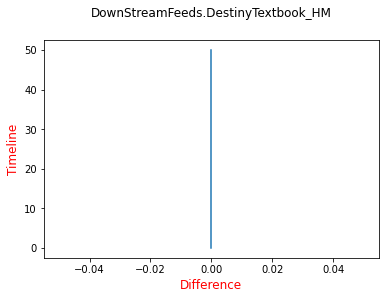

In [21]:
#Division by zero reults in graphing error on y=nrange/orange
dfx = Diff4dboT77.Difference
omin=min(dfx)
omax=max(dfx)
orange=omax-omin
nmin=0
nmax=20
nrange=nmax-nmin
#y=nrange/orange
#print (orange)
#print (nrange)
#print (y)
z=[(v-omin)*y+nmin for v in dfx]
plt.title('DownStreamFeeds.DestinyTextbook_HM', y=1.08)
plt.xlabel('Difference', fontsize =12, color='Red')
plt.ylabel('Timeline', fontsize =12, color='Red')
plt.plot(z,range(len(dfx)))

#5_GSDR_Synergy GEMS tables

In [22]:
Diff5gemsT78 = Diff5.loc[Diff5['TableName'] == 'SASI_A504_SYNERGY'] # Select Table to graph
Diff5gemsT79 = Diff5.loc[Diff5['TableName'] == 'SASI_AATD_SYNERGY'] # Select Table to graph
Diff5gemsT80 = Diff5.loc[Diff5['TableName'] == 'SASI_ACHS_SYNERGY'] # Select Table to graph

Diff5gemsT81 = Diff5.loc[Diff5['TableName'] == 'SASI_ACLH_SYNERGY'] # Select Table to graph
Diff5gemsT82 = Diff5.loc[Diff5['TableName'] == 'SASI_ACLS_SYNERGY'] # Select Table to graph
Diff5gemsT83 = Diff5.loc[Diff5['TableName'] == 'SASI_ACNF_SYNERGY'] # Select Table to graph
Diff5gemsT84 = Diff5.loc[Diff5['TableName'] == 'SASI_ACRS_SYNERGY'] # Select Table to graph
Diff5gemsT85 = Diff5.loc[Diff5['TableName'] == 'SASI_ADDITIONAL_TEACHER_SYNERGY'] # Select Table to graph

Diff5gemsT86 = Diff5.loc[Diff5['TableName'] == 'SASI_ADIS_SYNERGY'] # Select Table to graph
Diff5gemsT87 = Diff5.loc[Diff5['TableName'] == 'SASI_ADPO_SYNERGY'] # Select Table to graph
Diff5gemsT88 = Diff5.loc[Diff5['TableName'] == 'SASI_ADST_SYNERGY'] # Select Table to graph
Diff5gemsT89 = Diff5.loc[Diff5['TableName'] == 'SASI_AELT_SYNERGY'] # Select Table to graph
Diff5gemsT90 = Diff5.loc[Diff5['TableName'] == 'SASI_AEMG_SYNERGY'] # Select Table to graph

Diff5gemsT91 = Diff5.loc[Diff5['TableName'] == 'SASI_AENR_C'] # Select Table to graph
Diff5gemsT92 = Diff5.loc[Diff5['TableName'] == 'SASI_AENR_NON_ADA_ADM_SYNERGY'] # Select Table to graph
Diff5gemsT93 = Diff5.loc[Diff5['TableName'] == 'SASI_AENR_SYNERGY'] # Select Table to graph
Diff5gemsT94 = Diff5.loc[Diff5['TableName'] == 'SASI_AFEE_SYNERGY'] # Select Table to graph
Diff5gemsT95 = Diff5.loc[Diff5['TableName'] == 'SASI_AHLT_SYNERGY'] # Select Table to graph

Diff5gemsT96 = Diff5.loc[Diff5['TableName'] == 'SASI_ALRT_SYNERGY'] # Select Table to graph
Diff5gemsT97 = Diff5.loc[Diff5['TableName'] == 'SASI_AMST_SECT_STF'] # Select Table to graph
Diff5gemsT98 = Diff5.loc[Diff5['TableName'] == 'SASI_AMST_SECT_STF_HIS'] # Select Table to graph
Diff5gemsT99 = Diff5.loc[Diff5['TableName'] == 'SASI_AMST_SYNERGY'] # Select Table to graph
Diff5gemsT100 = Diff5.loc[Diff5['TableName'] == 'SASI_APGM_SYNERGY'] # Select Table to graph

Diff5gemsT101 = Diff5.loc[Diff5['TableName'] == 'SASI_APRN_SYNERGY'] # Select Table to graph
Diff5gemsT102 = Diff5.loc[Diff5['TableName'] == 'SASI_ASGR_SYNERGY'] # Select Table to graph
Diff5gemsT103 = Diff5.loc[Diff5['TableName'] == 'SASI_ASTI_SYNERGY'] # Select Table to graph
Diff5gemsT104 = Diff5.loc[Diff5['TableName'] == 'SASI_ASTU_GPA'] # Select Table to graph
Diff5gemsT105 = Diff5.loc[Diff5['TableName'] == 'SASI_ASTU_NON_ADA_ADM_SYNERGY'] # Select Table to graph

Diff5gemsT106 = Diff5.loc[Diff5['TableName'] == 'SASI_ASTU_SYNERGY'] # Select Table to graph
Diff5gemsT107 = Diff5.loc[Diff5['TableName'] == 'SASI_ATCH_SYNERGY'] # Select Table to graph
Diff5gemsT108 = Diff5.loc[Diff5['TableName'] == 'SASI_ATTD_SYNERGY'] # Select Table to graph
Diff5gemsT109 = Diff5.loc[Diff5['TableName'] == 'SASI_PARAPRO_SYNERGY'] # Select Table to graph
Diff5gemsT110 = Diff5.loc[Diff5['TableName'] == 'SASI_SMST_SYNERGY'] # Select Table to graph

Diff5gemsT111 = Diff5.loc[Diff5['TableName'] == 'SASI_SMST_SYNERGY_STAGE'] # Select Table to graph
Diff5gemsT112 = Diff5.loc[Diff5['TableName'] == 'SASI_UABN_SYNERGY'] # Select Table to graph
Diff5gemsT113 = Diff5.loc[Diff5['TableName'] == 'SASI_UATR_SYNERGY'] # Select Table to graph
Diff5gemsT114 = Diff5.loc[Diff5['TableName'] == 'SASI_UCES_SYNERGY'] # Select Table to graph
Diff5gemsT115 = Diff5.loc[Diff5['TableName'] == 'SASI_UGFT_SYNERGY'] # Select Table to graph

Diff5gemsT116 = Diff5.loc[Diff5['TableName'] == 'SASI_UPSR_SYNERGY'] # Select Table to graph
Diff5gemsT117 = Diff5.loc[Diff5['TableName'] == 'TEST_STU_ACC_OOD'] # Select Table to graph

In [23]:
# GSDR_Synergy Diff 5 table graphs to pdf 
with PdfPages(r'H:\ODS Migration Planning\Analysis\DailyRoutines\A\figures\pdf\GSDR_Synergy_GEMS_charts.pdf') as export_pdf: 
    
    #GSDR_Synergy: GEMS.SASI_A504_SYNERGY
    dfx = Diff5gemsT78.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_A504_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
    
    #GSDR_Synergy: GEMS.SASI_AATD_SYNERGY
    dfx = Diff5gemsT79.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_AATD_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ACHS_SYNERGY
    dfx = Diff5gemsT80.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ACHS_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ACLH_SYNERGY
    dfx = Diff5gemsT81.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ACLH_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ACLS_SYNERGY
    dfx = Diff5gemsT82.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ACLS_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ACNF_SYNERGY
    dfx = Diff5gemsT83.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ACNF_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ACRS_SYNERGY
    dfx = Diff5gemsT84.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ACRS_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ADDITIONAL_TEACHER_SYNERGY
    dfx = Diff5gemsT85.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ADDITIONAL_TEACHER_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ADIS_SYNERGY
    dfx = Diff5gemsT86.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ADIS_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ADPO_SYNERGY
    dfx = Diff5gemsT87.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ADPO_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ADST_SYNERGY
    dfx = Diff5gemsT88.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ADST_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_AELT_SYNERGY
    dfx = Diff5gemsT89.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_AELT_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_AEMG_SYNERGY
    dfx = Diff5gemsT90.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_AEMG_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_AENR_C
    dfx = Diff5gemsT91.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_AENR_C', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_AENR_NON_ADA_ADM_SYNERGY
    dfx = Diff5gemsT92.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_AENR_NON_ADA_ADM_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_AENR_SYNERGY
    dfx = Diff5gemsT93.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_AENR_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_AFEE_SYNERGY
    dfx = Diff5gemsT94.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_AFEE_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_AHLT_SYNERGY
    dfx = Diff5gemsT95.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_AHLT_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ALRT_SYNERGY
    dfx = Diff5gemsT96.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ALRT_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_AMST_SECT_STF
    dfx = Diff5gemsT97.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_AMST_SECT_STF', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_AMST_SECT_STF_HIS
    dfx = Diff5gemsT98.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_AMST_SECT_STF_HIS', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_AMST_SYNERGY
    dfx = Diff5gemsT99.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_AMST_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_APGM_SYNERGY
    dfx = Diff5gemsT100.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_APGM_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_APRN_SYNERGY
    dfx = Diff5gemsT101.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_APRN_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ASGR_SYNERGY
    dfx = Diff5gemsT102.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ASGR_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ASTI_SYNERGY
    dfx = Diff5gemsT103.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ASTI_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ASTU_GPA
    dfx = Diff5gemsT104.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ASTU_GPA', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ASTU_NON_ADA_ADM_SYNERGY
    dfx = Diff5gemsT105.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ASTU_NON_ADA_ADM_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ASTU_SYNERGY
    dfx = Diff5gemsT106.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ASTU_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ATCH_SYNERGY
    dfx = Diff5gemsT107.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ATCH_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_ATTD_SYNERGY
    dfx = Diff5gemsT108.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_ATTD_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_PARAPRO_SYNERGY
    dfx = Diff5gemsT109.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_PARAPRO_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_SMST_SYNERGY
    dfx = Diff5gemsT110.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_SMST_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_SMST_SYNERGY_STAGE
    dfx = Diff5gemsT111.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_SMST_SYNERGY_STAGE', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_UABN_SYNERGY
    dfx = Diff5gemsT112.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_UABN_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_UATR_SYNERGY
    dfx = Diff5gemsT113.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_UATR_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_UCES_SYNERGY
    dfx = Diff5gemsT114.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_UCES_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_UGFT_SYNERGY
    dfx = Diff5gemsT115.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_UGFT_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.SASI_UPSR_SYNERGY
    dfx = Diff5gemsT116.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.SASI_UPSR_SYNERGY', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()
        
    #GSDR_Synergy: GEMS.TEST_STU_ACC_OOD
    dfx = Diff5gemsT117.Difference
    omin=min(dfx)
    omax=max(dfx)
    orange=omax-omin
    nmin=0
    nmax=20
    nrange=nmax-nmin
    y=nrange/orange
    z=[(v-omin)*y+nmin for v in dfx]
    plt.title('GSDR_Synergy: GEMS.TEST_STU_ACC_OOD', y=1.08)
    plt.plot(z,range(len(dfx)))
    export_pdf.savefig()
    plt.close()    


In [ ]:
now01 = datetime.datetime.now()
print('Processing Step Complete: pdf files created in H drive',now01.strftime("%Y-%m-%d %H:%M:%S"))